**Table of contents**<a id='toc0_'></a>    
- [Direct Methods for the solution of Linear Systems. ](#toc1_)    
    - [- A random matrix (created with the function ``np.random.rand()``) with size varying with $n = \{10, 20, 30, \dots , 100\}$. ](#toc1_1_1_)    
    - [- The Vandermonde matrix (``np.vander``) of dimension $n = \{5, 10, 15, 20, 25, 30\}$ with respect to the vector $x = \{1, 2, 3, . . . , n\}$ ](#toc1_1_2_)    
    - [- The Hilbert matrix (``scipy.linalg.hilbert``) of dimension $n = \{4, 5, 6, . . . , 12\}$ ](#toc1_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

#  [&#8593;](#toc0_) <a id='toc1_'></a>Direct Methods for the solution of Linear Systems. 

Given a matrix $A \in \mathbb{R}^{n \times n}$ and the vector $x_{true} = (1, 1, \dots , 1)^T \in \mathbb{R}^n$, write a script that:
- Computes the right-hand side of the linear system $b = Ax_{true}$.
- Computes the condition number in $2$-norm of the matrix $A$. It is ill-conditioned? What if we use the $\infty$-norm instead of the $2$-norm?
- Solves the linear system $Ax = b$ with the function ```np.linalg.solve()```.
- Computes the relative error between the solution computed before and the true solution $x_{true}$.
    Remember that the relative error between $x_{true}$ and $x$ in $\mathbb{R}^n$ can be computed as
$$ E(x_{true}, x) = \frac{\| x - x_{true} \|_2}{\| x_{true} \|_2}$$
- Plot a graph (using ```matplotlib.pyplot```) with the relative errors as a function of $n$ and (in a new
window) the condition number in $2$-norm $K_2(A)$ and in $\infty$-norm, as a function of $n$.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from typing import Callable

def compute_error(A_func: Callable[[int], np.ndarray], nn: list[int], show_bounds : bool = False):
    relative_errors, condition_2_norm, condition_inf_norm = [], [], []
    for n in nn:
        A = A_func(n)
        if A.shape[0] != A.shape[1]:
            raise ValueError(f'The matrix A should be square but is shape {A.shape}')
        
        x_true = np.ones((n,1))
        right_hand_side = np.dot(A,x_true)

        # Conditional number in 2-norm and inf-norm
        k_2_A = np.linalg.norm(A,2) * np.linalg.norm(np.linalg.inv(A),2)
        k_inf_A = np.linalg.norm(A,np.inf) * np.linalg.norm(np.linalg.inv(A),np.inf)
        
        condition_2_norm.append(k_2_A)
        condition_inf_norm.append(k_inf_A)

        # Computing relative error between x and x_true
        x = np.linalg.solve(A, right_hand_side)
        relative_error = np.linalg.norm(x - x_true, 2) / np.linalg.norm(x_true, 2)
        relative_errors.append(relative_error)
    
    plt.figure(figsize=(15,4))
    plt.suptitle(A_func.__name__, size=16)
    
    plt.subplot(1,3,1)
    plt.title(f'Relative error')
    plt.plot(nn, relative_errors)

    plt.subplot(1,3,2)
    plt.title(f'Condition number in 2 norm')
    plt.plot(nn, condition_2_norm, label='$K_2(A) $')
    if show_bounds:
        plt.plot(nn, condition_inf_norm / nn, label='$K_2(A) $ Lower bound')
        plt.plot(nn, condition_inf_norm * nn, label='$K_2(A) $ Upper bound')
        plt.legend(loc='upper left')
        
    
    plt.subplot(1,3,3)
    plt.title(f'Condition number in $\infty$ norm')
    plt.plot(nn, condition_inf_norm)


Test the program above with the following choices of $A \in \mathbb{R}^{n \times n}$:

###  [&#8593;](#toc0_) <a id='toc1_1_1_'></a>A random matrix (created with the function ``np.random.rand()``) with size varying with $n = \{10, 20, 30, \dots , 100\}$. 

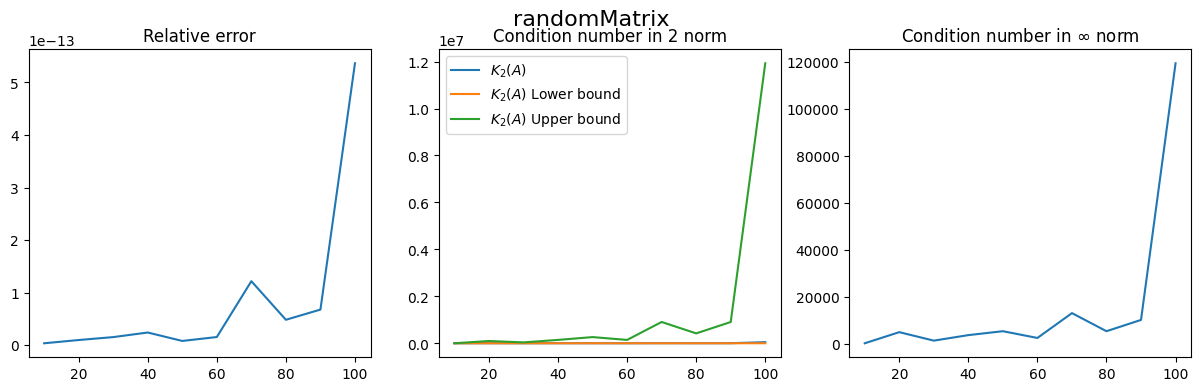

In [18]:
def randomMatrix(n: int) -> np.ndarray:
    return np.random.rand(n,n)
compute_error(randomMatrix,np.arange(10,110,10), show_bounds=True)

###  [&#8593;](#toc0_) <a id='toc1_1_2_'></a>The Vandermonde matrix (``np.vander``) of dimension $n = \{5, 10, 15, 20, 25, 30\}$ with respect to the vector $x = \{1, 2, 3, . . . , n\}$ 

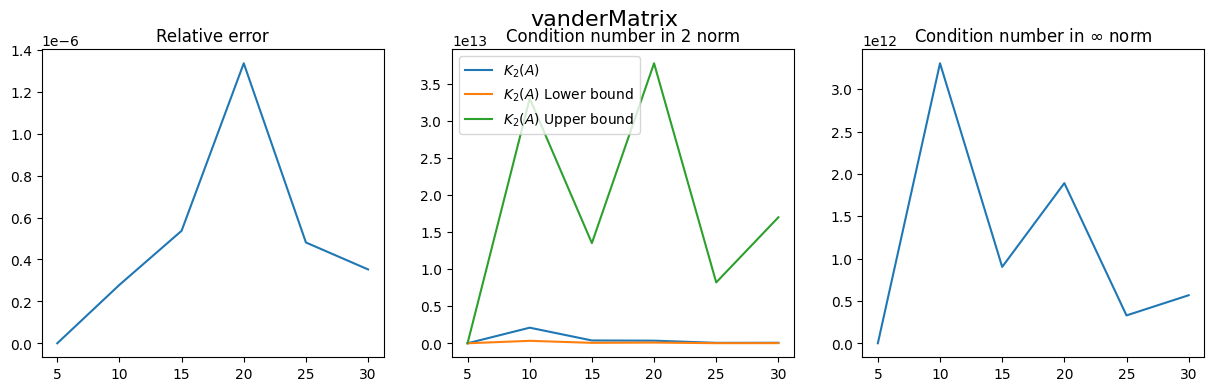

In [19]:
def vanderMatrix(n: int) -> np.ndarray:
    x = np.arange(1, n + 1, 1)
    return np.vander(x, n)
compute_error(vanderMatrix, np.arange(5,35,5), show_bounds=True)

###  [&#8593;](#toc0_) <a id='toc1_1_3_'></a>The Hilbert matrix (``scipy.linalg.hilbert``) of dimension $n = \{4, 5, 6, . . . , 12\}$ 

The Hilbert matrix is symmetric so $\|A\|_2 = \rho(A)$ 

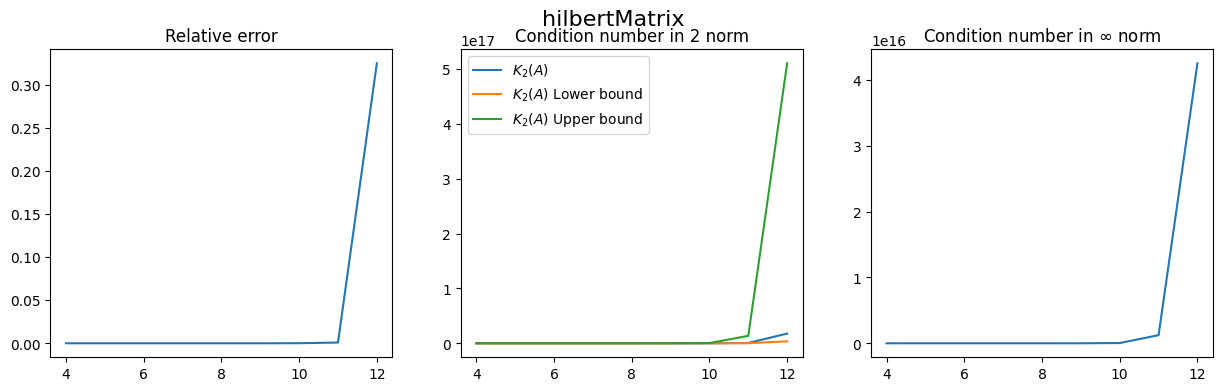

In [20]:
def hilbertMatrix(n:int) -> np.ndarray:
    return scipy.linalg.hilbert(n)
compute_error(hilbertMatrix, np.arange(4,13,1), show_bounds=True)

For a real matrix $A \in \mathbb{R}^{m\times n}$  we have that:

$$ \frac{1}{\sqrt{n}}\| A \|_\infty \leq \| A \|_2 \leq \sqrt{m}\| A \|_\infty $$

and similarly:

$$ \frac{1}{\sqrt{n}}\| A^{-1} \|_\infty \leq \| A^{-1} \|_2 \leq \sqrt{m}\| A^{-1} \|_\infty $$

hence:

$$ \frac{1}{n}\| A^{-1} \|_\infty \| A \|_\infty \leq \| A^{-1} \|_2 \| A \|_2 \leq m\| A^{-1} \|_\infty \| A \|_\infty $$

$$ \frac{1}{n} K_\infty(A) \leq K_2(A) \leq m K_\infty(A) $$

taken from https://en.wikipedia.org/wiki/Matrix_norm?oldformat=true#Examples_of_norm_equivalence.

Using the parameter `show_bounds = True` it's possible to visualize this upper and lower bound for $ \| A \|_2 $